In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [102]:
df = pd.read_excel('Sample - Superstore.csv')

In [103]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


###Análise Exploratória

In [19]:
df.shape

(9994, 21)

In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [106]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [105]:
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")

Número de linhas duplicadas: 0


In [107]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [15]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [109]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [18]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [21]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


##Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [20]:
supplies = df[df["Category"]=='Office Supplies']

In [21]:
sales_by_city = supplies.groupby('City')["Sales"].sum()

In [22]:
sales_by_city

City
Aberdeen         25.500
Abilene           1.392
Akron          1113.388
Albuquerque     943.122
Alexandria     4879.790
                 ...   
Woonsocket      142.590
Yonkers         665.964
York            395.920
Yucaipa          50.800
Yuma             55.352
Name: Sales, Length: 484, dtype: float64

In [23]:
max_by_city = sales_by_city.idxmax()
print(max_by_city)
max_by_value = sales_by_city.max()
print(max_by_value)

New York City
71361.00600000001


In [20]:
print(f"A cidade com o maior valor de venda de 'Office Supplies' é {max_by_city} com um valor total de vendas de {round(max_by_value,2)}.")


A cidade com o maior valor de venda de 'Office Supplies' é New York City com um valor total de vendas de 71361.01.


###Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

In [85]:
sales_by_date = df.groupby('Order Date')['Sales'].sum().reset_index()
sales_by_date

,Order Date,Sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


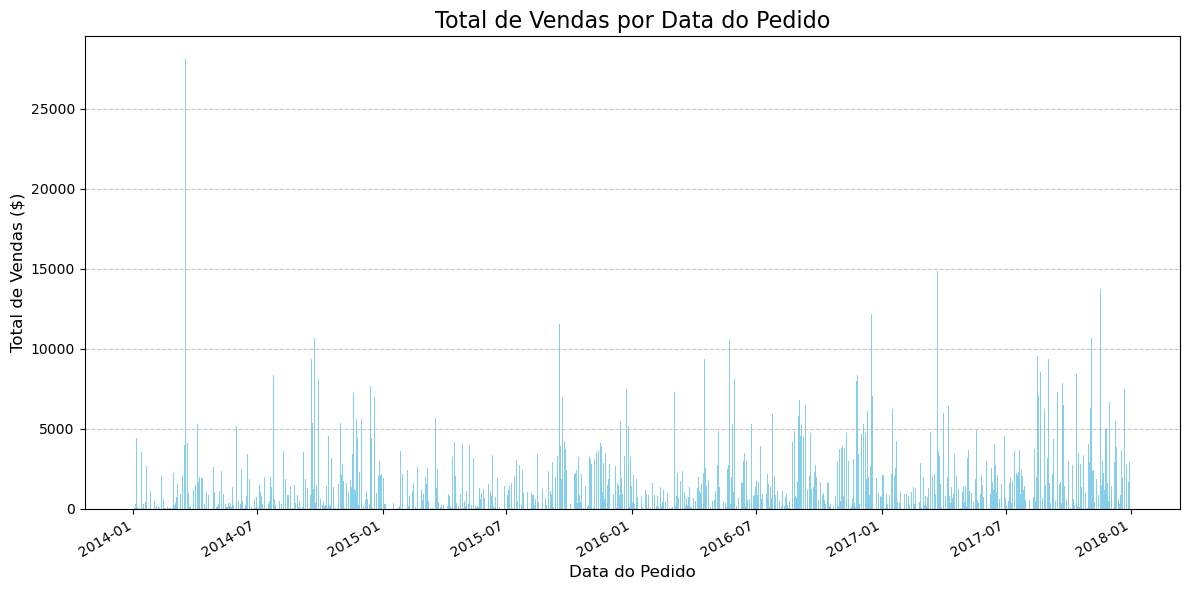

In [86]:
plt.figure(figsize=(12, 6))
plt.bar(sales_by_date['Order Date'], sales_by_date['Sales'], color='skyblue')

# 4. Personalizar o gráfico
plt.title('Total de Vendas por Data do Pedido', fontsize=16)
plt.xlabel('Data do Pedido', fontsize=12)
plt.ylabel('Total de Vendas ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Melhorar a formatação
plt.gcf().autofmt_xdate()  # Formata automaticamente as datas no eixo x
plt.tight_layout()

###Qual o Total de Vendas por Estado?Demonstre o resultado através de um gráfico de barras.

In [53]:
total_sales_per_state = df.groupby('State')['Sales'].sum().reset_index()
total_sales_per_state_sorted = total_sales_per_state.sort_values(by='Sales', ascending=False)
print(f'O total de vendas por estado é: {round(total_sales_per_state_sorted,2)}')

O total de vendas por estado é:                    State      Sales
3             California  457687.63
30              New York  310876.27
41                 Texas  170188.05
45            Washington  138641.27
36          Pennsylvania  116511.91
8                Florida   89473.71
11              Illinois   80166.10
33                  Ohio   78258.14
20              Michigan   76269.61
44              Virginia   70636.72
31        North Carolina   55603.16
12               Indiana   53555.36
9                Georgia   49095.84
15              Kentucky   36591.75
28            New Jersey   35764.31
1                Arizona   35282.00
47             Wisconsin   32114.61
4               Colorado   32108.12
40             Tennessee   30661.87
21             Minnesota   29863.15
19         Massachusetts   28634.43
6               Delaware   27451.07
18              Maryland   23705.52
37          Rhode Island   22627.96
23              Missouri   22205.15
34              Oklahoma   19683

###Quais São as 10 Cidades com Maior Total de Vendas?Demonstre o resultado através de um gráfico de barras.

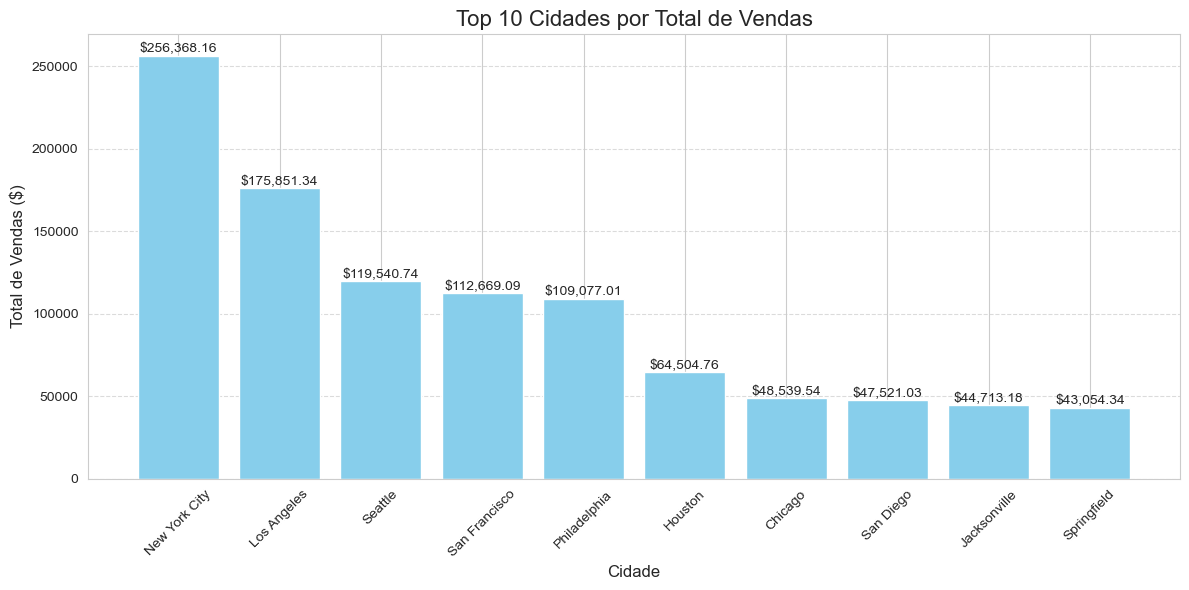

In [108]:
total_sales_per_city = df.groupby('City')['Sales'].sum().reset_index()
total_sales_per_city_sorted = total_sales_per_city.sort_values(by='Sales', ascending=False)
ten_total_sales_per_city_sorted = total_sales_per_city_sorted.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(ten_total_sales_per_city_sorted['City'], 
               ten_total_sales_per_city_sorted['Sales'], 
               color='skyblue')

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.2f}',
             ha='center', va='bottom')

plt.title('Top 10 Cidades por Total de Vendas', fontsize=16)
plt.xlabel('Cidade', fontsize=12)
plt.ylabel('Total de Vendas ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Qual Segmento Teve o Maior Total de Vendas?Demonstre o resultado através de um gráfico de pizza.

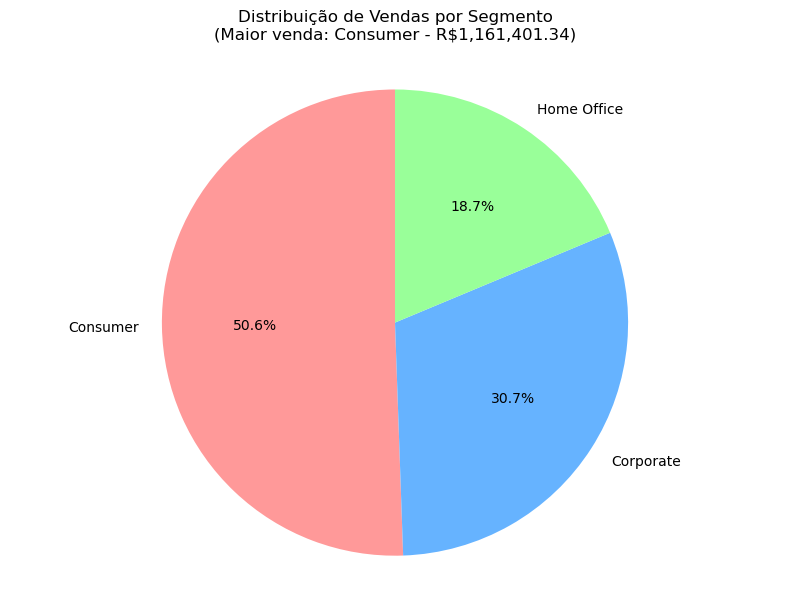

In [84]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().round(2).reset_index()
sales_per_segment_sorted = sales_per_segment.sort_values(by='Sales', ascending=False)
segment_maior_vendas = sales_per_segment_sorted.iloc[0]['Segment']
total_maior_vendas = sales_per_segment_sorted.iloc[0]['Sales']

# 4. Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sales_per_segment_sorted['Sales'], 
        labels=sales_per_segment_sorted['Segment'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99'])

plt.title(f'Distribuição de Vendas por Segmento\n(Maior venda: {segment_maior_vendas} - R${total_maior_vendas:,.2f})', pad=20)
plt.axis('equal')  # Garante que o gráfico fique circular

# 5. Melhorar a visualização
plt.tight_layout()
plt.show()


###(Desafio Nível Baby) Qual o Total de Vendas Por Segmento e Por Ano?


In [83]:
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
sales_per_segment_year = df.groupby(['Segment', 'Year'])['Sales'].sum().reset_index()
sales_per_segment_year_sorted = sales_per_segment_year.sort_values(by=['Year', 'Sales'], ascending=[True, False])
print(f'O Total de venda por segmento e ano é:.')
sales_per_segment_year_sorted

O Total de venda por segmento e ano é:.


,Segment,Year,Sales
0,Consumer,2014,266096.8126
4,Corporate,2014,128434.8737
8,Home Office,2014,89715.8118
1,Consumer,2015,266535.9333
5,Corporate,2015,128757.3069
9,Home Office,2015,75239.2688
2,Consumer,2016,296863.8992
6,Corporate,2016,207106.3618
10,Home Office,2016,105235.3370
3,Consumer,2017,331904.6999


### (Desafio Nível Júnior) Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:

###Se o Valor_Venda for maior que 1000 recebe 15% de desconto.Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

###Quantas Vendas Receberiam 15% de Desconto?

In [51]:
df['Valor_Final'] = np.where(
    df['Sales'] > 1000,
    df['Sales'] * 0.85,  # 15% de desconto para vendas > 1000
    df['Sales'] * 0.90   # 10% de desconto para vendas <= 1000
)

sales_15_percent = len(df[df['Sales'] > 1000])

print(f"Total de vendas que recebem 15% de desconto: {sales_15_percent}")

Total de vendas que recebem 15% de desconto: 468


###(Desafio Nível Master) Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [50]:
mean_before_discont = round(df['Sales'].mean(),2)
mean_after_discont = round(df['Valor_Final'].mean(),2)
print(f'A média do valor de venda antes e depois do desconto são respectivamente: {mean_before_discont} e {mean_after_discont}')

A média do valor de venda antes e depois do desconto são respectivamente: 229.86 e 201.92


###  (Desafio Nível Master Ninja) Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha.

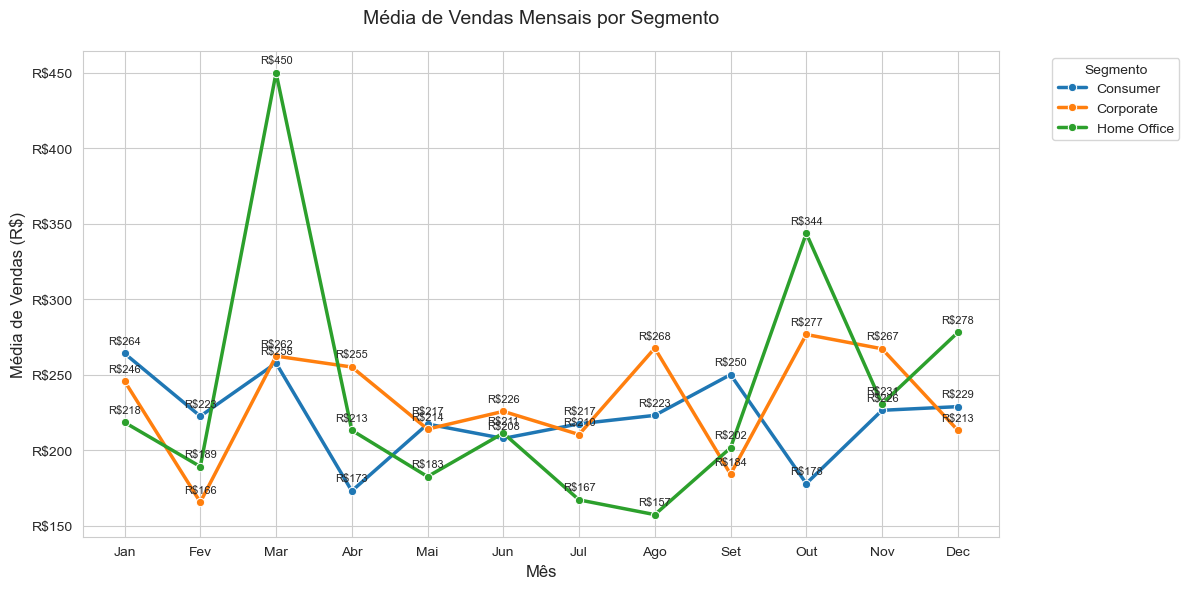

In [92]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
mean_sales_per_segment_year_month = df.groupby(['Segment', 'Month'])['Sales'].mean().reset_index()
mean_sales_per_segment_year_month_sorted = mean_sales_per_segment_year_month.sort_values(by=['Month', 'Sales'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Criar o gráfico de linhas
sns.lineplot(data=mean_sales_per_segment_month_sorted, 
             x='Month', 
             y='Sales', 
             hue='Segment',
             marker='o',
             linewidth=2.5,
             palette=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Personalizações
plt.title('Média de Vendas Mensais por Segmento', pad=20, fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Média de Vendas (R$)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dec'])

# Formatar eixos
plt.gca().yaxis.set_major_formatter('R${x:,.0f}')
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar valores nos pontos
for segment in mean_sales_per_segment_month_sorted['Segment'].unique():
    segment_data = mean_sales_per_segment_month_sorted[mean_sales_per_segment_month_sorted['Segment'] == segment]
    for i, row in segment_data.iterrows():
        plt.text(row['Month'], row['Sales']+5, f'R${row["Sales"]:,.0f}', 
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### (Desafio Nível Master Ninja das Galáxias) Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?Demonstre tudo através de um único gráfico.

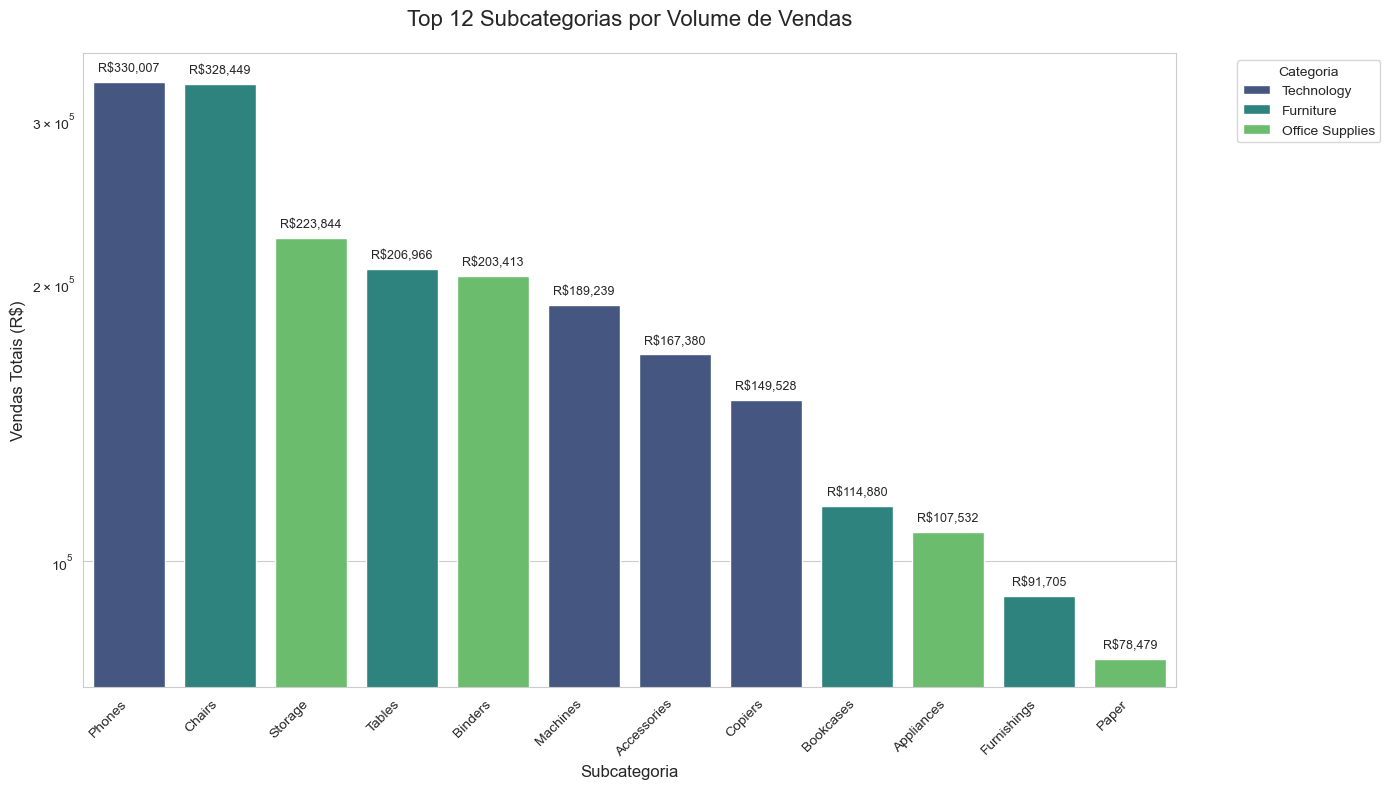

In [101]:
total_sales_per_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
top_12_total_sales_per_category_subcategory = total_sales_per_category_subcategory_sorted.nlargest(12, 'Sales')
top_12_total_sales_per_category_subcategory


plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")


ax = sns.barplot(data=top_12_total_sales_per_category_subcategory, 
                 x='Sub-Category', 
                 y='Sales', 
                 hue='Category',
                 palette='viridis',
                 estimator=sum)


plt.title('Top 12 Subcategorias por Volume de Vendas', fontsize=16, pad=20)
plt.xlabel('Subcategoria', fontsize=12)
plt.ylabel('Vendas Totais (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  


for p in ax.patches:
    ax.annotate(f'R${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=9)

plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
